## QUADRI ALLI

## Requirement - Using k-means clustering algorithm to identify the regions that offers the highest proportion of Medicaid services in the United States.

### Hypothesis - States with significant amount of population and city-like states will offer more medicaid services to their residents.

- Clean data ( drop rows with null values in LATITUDE & LONGITUDE)
- Provider location (Longitude & Latitude)
- Identify using Medicaid Provider ID
- Reduce Columns
- Create ML Algorithm (KMeans)
- Create a dashboard

This is a Nationwide list of doctors and medical facilities who accepts different types of Medicaid insurance. The list includes their 
identification information, location, specialty, phone number, and other details about their services. There is also information about whether they serve medically fragile children and adults, and when their enrollment and revalidation dates are.

In [42]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import streamlit as st

In [43]:
df = pd.read_csv('Medicaid_Enrolled_Provider_Listing.csv', low_memory=False)
df

,MEDICAID PROVIDER ID,NPI,PROVIDER OR FACILITY NAME,MEDICAID TYPE,PROFESSION OR SERVICE,PROVIDER SPECIALTY,SERVICE ADDRESS,CITY,STATE,ZIP CODE,COUNTY,TELEPHONE,LATITUDE,LONGITUDE,ENROLLMENT BEGIN DATE,NEXT ANTICIPATED REVALIDATION DATE,FILE DATE,MEDICALLY FRAGILE CHILDREN AND ADULTS DIRECTORY IND,PROVIDER EMAIL
0,13098,1.477673e+09,JCCA FH DIVISION,FFS,CHILD (FOSTER) CARE AGENCIES,NaN,1075 BROADWAY,PLEASANTVILLE,NY,10570-2345,WESTCHESTER,NaN,41.12940,-73.77794,02/01/1979,12/11/2020,03/27/2023,N,NaN
1,13098,1.477673e+09,JCCA FH DIVISION,FFS,CHILD (FOSTER) CARE AGENCIES,NaN,111 N 3RD AVE VERNONDALE RES,MOUNT VERNON,NY,10550-1364,WESTCHESTER,NaN,40.91451,-73.83634,02/01/1979,12/11/2020,03/27/2023,N,NaN
2,13098,1.477673e+09,JCCA FH DIVISION,FFS,CHILD (FOSTER) CARE AGENCIES,NaN,162 19 76TH AVE,FLUSHING,NY,11366-1133,QUEENS,NaN,40.72665,-73.79789,02/01/1979,12/11/2020,03/27/2023,N,NaN
3,13098,1.477673e+09,JCCA FH DIVISION,FFS,CHILD (FOSTER) CARE AGENCIES,NaN,16208 77TH AVE,FLUSHING,NY,11366-1022,QUEENS,NaN,40.72416,-73.80730,02/01/1979,12/11/2020,03/27/2023,N,NaN
4,13098,1.477673e+09,JCCA FH DIVISION,FFS,CHILD (FOSTER) CARE AGENCIES,NaN,1810 AVENUE H,BROOKLYN,NY,11230-1820,KINGS,NaN,40.63024,-73.95893,02/01/1979,12/11/2020,03/27/2023,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912421,7527746,1.942916e+09,VISTA ON THE BAY INC,FFS,OPTICAL ESTABLISHMENT,NaN,1612 SHEEPSHEAD BAY RD,BROOKLYN,NY,11235-3803,KINGS,7.189341e+09,40.58650,-73.95247,03/21/2023,03/24/2028,03/27/2023,N,NaN
912422,7527755,1.831745e+09,PATEL YESHA KAMLESH,FFS,OPTOMETRIST,NaN,1536 FLATBUSH AVE,BROOKLYN,NY,11210-2427,KINGS,7.184342e+09,40.63349,-73.94852,12/21/2022,03/24/2028,03/27/2023,N,NaN
912423,7527755,1.831745e+09,PATEL YESHA KAMLESH,FFS,OPTOMETRIST,NaN,1704 CHURCH AVE,BROOKLYN,NY,11226-4786,KINGS,7.186845e+09,40.64902,-73.96390,12/21/2022,03/24/2028,03/27/2023,N,NaN
912424,7527755,1.831745e+09,PATEL YESHA KAMLESH,FFS,OPTOMETRIST,NaN,455 MALCOLM X BLVD,NEW YORK,NY,10037-3331,NEW YORK,2.123682e+09,40.81264,-73.94207,12/21/2022,03/24/2028,03/27/2023,N,NaN


In [44]:
df.columns

Index(['MEDICAID PROVIDER ID', 'NPI', 'PROVIDER OR FACILITY NAME',
       'MEDICAID TYPE', 'PROFESSION OR SERVICE', 'PROVIDER SPECIALTY',
       'SERVICE ADDRESS', 'CITY', 'STATE', 'ZIP CODE', 'COUNTY', 'TELEPHONE',
       'LATITUDE', 'LONGITUDE', 'ENROLLMENT BEGIN DATE',
       'NEXT ANTICIPATED REVALIDATION DATE', 'FILE DATE',
       'MEDICALLY FRAGILE CHILDREN AND ADULTS DIRECTORY IND',
       'PROVIDER EMAIL'],
      dtype='object')

In [45]:
df['MEDICAID TYPE'].value_counts()

FFS     843979
OPRA     63137
MCO       5310
Name: MEDICAID TYPE, dtype: int64

In [46]:
df['LONGITUDE'].isnull().values.any()

True

In [48]:
df['LATITUDE'].isnull().values.any()

True

In [49]:
# Choosing the columns i would like to work on. 
clean_df = df[['LONGITUDE', 'LATITUDE', 'MEDICAID PROVIDER ID']]
clean_df

,LONGITUDE,LATITUDE,MEDICAID PROVIDER ID
0,-73.77794,41.12940,13098
1,-73.83634,40.91451,13098
2,-73.79789,40.72665,13098
3,-73.80730,40.72416,13098
4,-73.95893,40.63024,13098
...,...,...,...
912421,-73.95247,40.58650,7527746
912422,-73.94852,40.63349,7527755
912423,-73.96390,40.64902,7527755
912424,-73.94207,40.81264,7527755


In [50]:
clean_df = clean_df.dropna(axis=0, how='any', inplace= False)
clean_df

,LONGITUDE,LATITUDE,MEDICAID PROVIDER ID
0,-73.77794,41.12940,13098
1,-73.83634,40.91451,13098
2,-73.79789,40.72665,13098
3,-73.80730,40.72416,13098
4,-73.95893,40.63024,13098
...,...,...,...
912421,-73.95247,40.58650,7527746
912422,-73.94852,40.63349,7527755
912423,-73.96390,40.64902,7527755
912424,-73.94207,40.81264,7527755


In [51]:
X = clean_df.loc[:, ["MEDICAID PROVIDER ID", "LONGITUDE", "LATITUDE"]]
X.head()

,MEDICAID PROVIDER ID,LONGITUDE,LATITUDE
0,13098,-73.77794,41.12940
1,13098,-73.83634,40.91451
2,13098,-73.79789,40.72665
3,13098,-73.80730,40.72416
4,13098,-73.95893,40.63024


In [52]:
test = KMeans(n_clusters=6).fit(X = clean_df[['LONGITUDE', 'LATITUDE']], 
                                sample_weight= clean_df['MEDICAID PROVIDER ID'])

cluster_label = test.labels_
cluster_label

/Users/quadrialli/miniconda3/envs/stenv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [53]:
plot_df= clean_df.copy()
plot_df['cluster']= cluster_label
plot_df.head()

,LONGITUDE,LATITUDE,MEDICAID PROVIDER ID,cluster
0,-73.77794,41.12940,13098,0
1,-73.83634,40.91451,13098,0
2,-73.79789,40.72665,13098,0
3,-73.80730,40.72416,13098,0
4,-73.95893,40.63024,13098,0


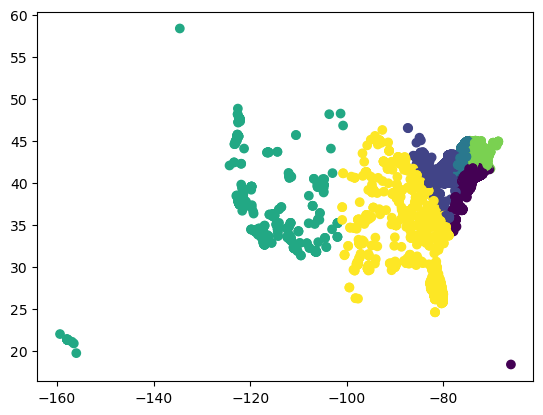

In [54]:
plt.scatter(x=plot_df["LONGITUDE"], y=plot_df["LATITUDE"], c=plot_df['cluster'])

In [38]:
plot_df.to_csv("account_data.csv", index= False)

### Conclusion - According to my analysis, the Northeast region of the United States has a significant number of individuals covered by Medicaid. Therefore, I would recommend that a medical practitioner consider starting a private practice in places such as New York, where there is a high concentration of Medicaid coverage, as indicated by the clusters.